<font size="5">**Module 2 Mini-Project**</font>

<font size="4">**Medical appointment**</font>

In [2]:
import pandas as pd

df = pd.read_csv('KaggleV2-May-2016.csv')

In [3]:
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [4]:
df.shape

(110527, 14)

In [5]:
df.dropna()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [6]:
from sklearn.preprocessing import LabelEncoder
df["No-show"] = LabelEncoder().fit_transform(df["No-show"])

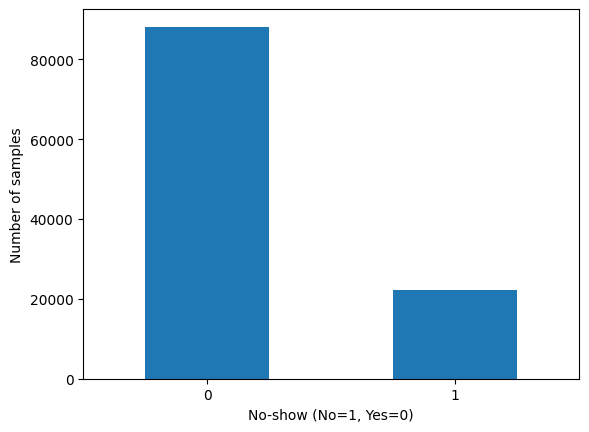

In [7]:
import matplotlib.pyplot as plt
df["No-show"].value_counts().plot(kind='bar', rot=0)
plt.xlabel("No-show (No=1, Yes=0)")
plt.ylabel("Number of samples")
plt.show()

In [8]:
df['No-show'].count()

110527

In [9]:
from sklearn.preprocessing import LabelEncoder
df["Gender"] = LabelEncoder().fit_transform(df["Gender"])

In [10]:
nominal = df[["Gender", "Age", "Scholarship", "Hipertension", "Diabetes", "Alcoholism", "Handcap", "SMS_received"]]

<AxesSubplot: >

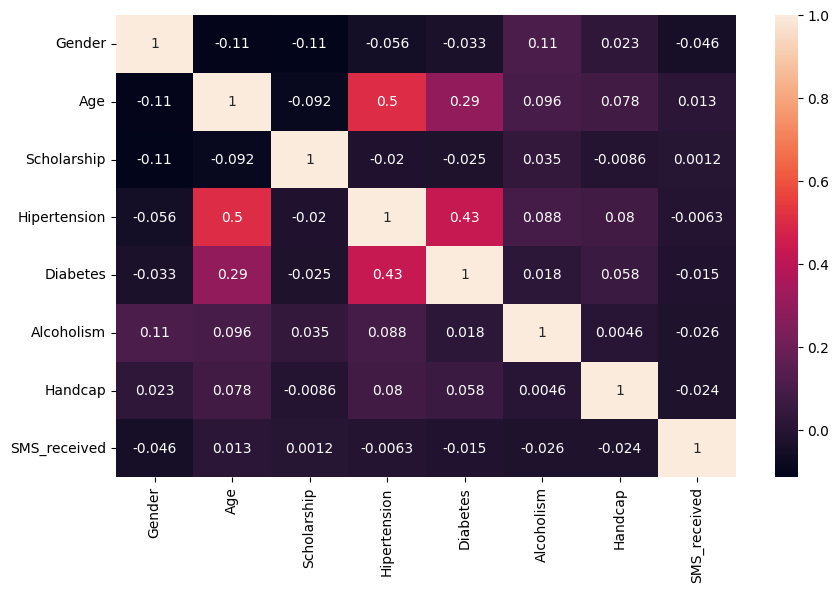

In [11]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(nominal.corr(), annot=True)

In [12]:
nominal

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,0,62,0,1,0,0,0,0
1,1,56,0,0,0,0,0,0
2,0,62,0,0,0,0,0,0
3,0,8,0,0,0,0,0,0
4,0,56,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...
110522,0,56,0,0,0,0,0,1
110523,0,51,0,0,0,0,0,1
110524,0,21,0,0,0,0,0,1
110525,0,38,0,0,0,0,0,1


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = nominal.iloc[:, 1:2].values

nominal.iloc[:, 1:2] = scaler.fit_transform(x)

C:\Users\angel\AppData\Local\Temp\ipykernel_11076\1704812490.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nominal.iloc[:, 1:2] = scaler.fit_transform(x)


In [14]:
nominal = pd.concat([nominal, df["No-show"]], axis=1)

In [15]:
y = nominal["No-show"].values

x_columns = len(nominal.columns)

x = nominal.iloc[:, 0:x_columns].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [16]:
X_validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [17]:
print(len(X_train), len(X_test), len(X_validate))

88421 11053 11053


In [26]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=1000).fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)

results = model.score(X_test, y_test)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

[[8892    0]
 [   0 2161]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8892
           1       1.00      1.00      1.00      2161

    accuracy                           1.00     11053
   macro avg       1.00      1.00      1.00     11053
weighted avg       1.00      1.00      1.00     11053

